In [12]:
#%% Imports.
import numpy as np
import matplotlib
%matplotlib inline
#%matplotlib notebook
import ardent

In [13]:
#%% Load template and target.
# specify path
atlas_image_filename = '/home/dtward/Documents/cis/ardent-work/neuronex2/datasets/Adt27-55_02_Adt27-55_02_MNI.img'
target_image_filename = '/home/dtward/Documents/cis/ardent-work/neuronex2/datasets/Adt27-55_03_Adt27-55_03_MNI.img'
#TODO update filenames

# load
atlas = ardent.io.load(atlas_image_filename, down=[4,4,4], norm='sad',pad=1)
target = ardent.io.load(target_image_filename, down=[4,4,4], norm='sad')

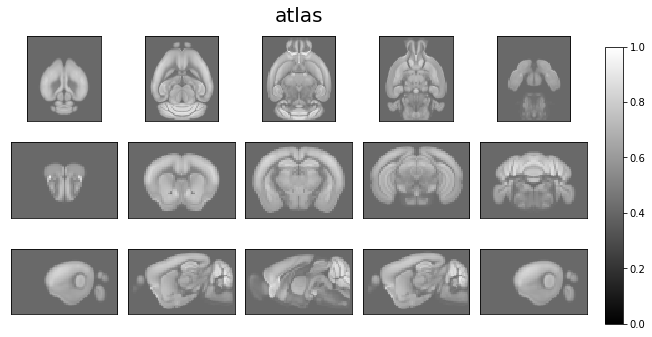

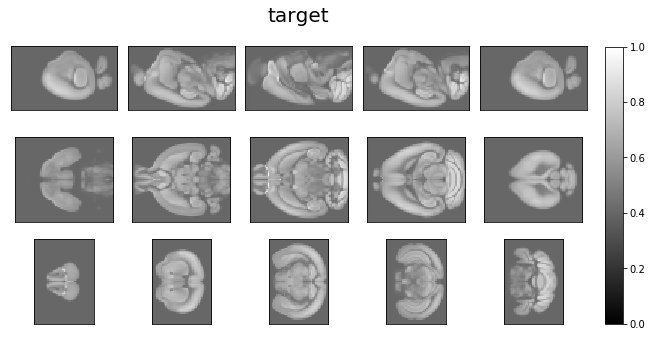

In [5]:
#%% Visualize images before registration, check orientation
ardent.heatslices(atlas, title='atlas', limit_mode='stdev')
ardent.heatslices(target, title='target', limit_mode='stdev')

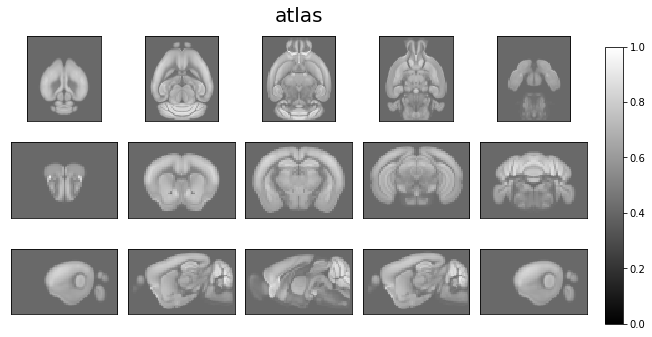

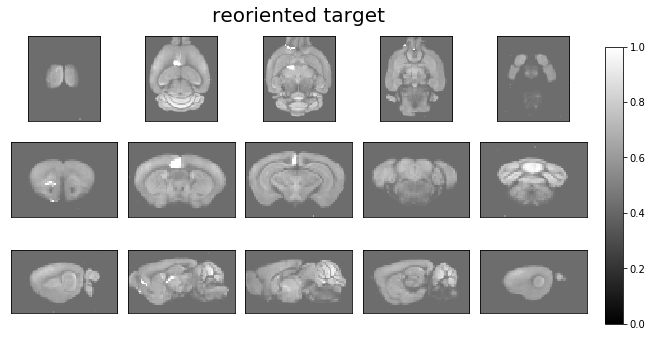

In [16]:
#%% Orient images.
# Here we will orient the target to the template (atlas).
reoriented_target = np.copy(target)
reoriented_target = np.rot90(reoriented_target, axes=(1,2))
reoriented_target = np.rot90(reoriented_target, axes=(2,0))
reoriented_target = np.flip(reoriented_target, axis=0)
reoriented_target = np.flip(reoriented_target, axis=1)

# View
ardent.heatslices(atlas, title='atlas', limit_mode='stdev')
ardent.heatslices(reoriented_target, title='reoriented target', limit_mode='stdev')

In [ ]:
#%% Use reoriented target.
target = reoriented_target.copy()

In [ ]:
#%% Perform registration.
transform = ardent.Transform()
transform.register(template=atlas, target=target, 
                   sigmaM=1.0,sigmaR=1e3, 
                   sigmaA=10.0, 
                   eV=1e0, eT=1e-5, eL=1e-8, 
                   niter=50, draw=True)

In [ ]:
#%% Apply the transformation.
resampled_atlas = transform.apply_transform(subject=atlas, deform_to='target-identity', save_path=None)
deformed_atlas = transform.apply_transform(subject=atlas, deform_to='target', save_path=None)
deformed_target = transform.apply_transform(subject=target, deform_to='template', save_path=None)

In [ ]:
#%% Visualize results.
# To simply visualize error we plot the difference between images.
ardent.heatslices(target - resampled_atlas, title='error before registration', limit_mode='stdev')
ardent.heatslices(target - deformed_atlas, title='error after registration', limit_mode='stdev')
